# **Question 1 - Singular Value Decomposition**

## **a)** Proof

For the singular value decomposition of matrix **$A = USV^T$**:
- **U** is an $m \times m$ complex unitary matrix. The columns of U = $[u_1, u_2, ..., u_{\alpha}]$ are the left-singular vectors of A, and form an orthonormal basis for the column space.
- $S$ is an $m \times n$ rectangular diagonal matrix with non-negative real numbers on the diagonal. These diagonal entries $s_{\alpha}$ are the singular values.
- $V^T$ is the transpose of an $n \times n$ complex unitary matrix. The columns of V = $[v_1, v_2, ..., v_{\alpha}]$ are the right-singular vectors of A, and for an orthonormal basis for the row space.

U, V, and S are defined such that these basis vectors diagonalize the matrix A.

i.e. $Av_1 = s_{1}u_1$, $Av_2 = s_{2}u_2$, ..., $Av_{\alpha} = s_{\alpha}u_{\alpha}$

so these equations tell us column by column that $AV = US$, and since $V^TV = I$, $A = USV^T$:
$$ A = USV^T = u_1s_{\alpha 1}v_1^T + ... + u_{\alpha}s_{\alpha}v_{\alpha}^T = \sum_{\alpha} u_{\alpha}s_{\alpha}v_{\alpha}^T $$

## **b)** SVD on a $10 \times 6$ matrix

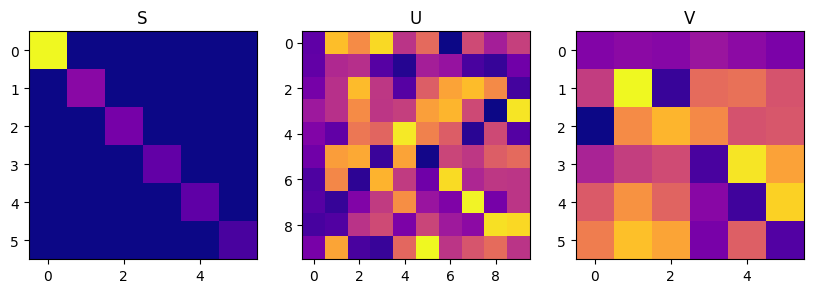

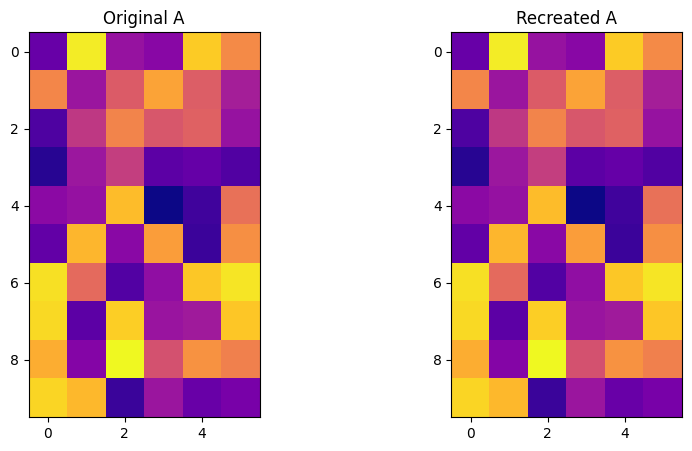

Recreation = Original: True


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# create a 10 x 6 matrix filled with random numbers (uniform between 0 and 1)
A = np.random.default_rng().uniform(0, 1, size=(10, 6))

# do SVD
U, S, V = np.linalg.svd(A)

# Create a single figure with two subplots side by side
plt.figure(1, figsize=(10, 5))

# Plot S in the first subplot
plt.subplot(1, 3, 1)
plt.imshow(np.diag(S), cmap='plasma')
plt.title('S')

# Plot U in the second subplot
plt.subplot(1, 3, 2)
plt.imshow(U, cmap='plasma')
plt.title('U')

# Plot V in the third subplot
plt.subplot(1, 3, 3)
plt.imshow(V, cmap='plasma')
plt.title('V')

plt.show()

# Compute the sum and compare to original matrix
k = min(U.shape[1], V.shape[0])

# Construct the diagonal matrix from the top k singular values
S_matrix = np.diag(S[:k])

# Recompute the original matrix
recreated_A = U[:, :k] @ S_matrix @ V[:k, :]

plt.figure(2, figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(A, cmap='plasma')
plt.title('Original A')

plt.subplot(1, 2, 2)
plt.imshow(recreated_A, cmap='plasma')
plt.title('Recreated A')

plt.show()

print(f"Recreation = Original: {np.allclose(A, recreated_A)}")

## **c)** Truncation and Accuracy

Now try truncating the sum in equation, i.e. take only the n largest singular values in the sum. Calculate the mean error between the reconstructed matrix and the original matrix as a function of n.

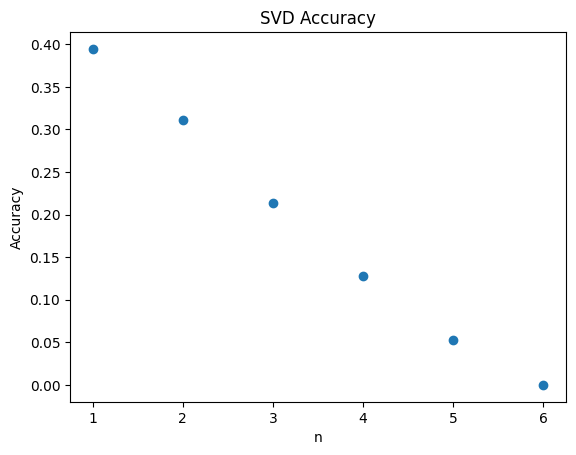

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def accuracy(A, recreated_A):
    return np.linalg.norm(A - recreated_A) / np.linalg.norm(A)

def do_SVD(m = 10, n = 6, plot = True):
    # create an m x n matrix filled with random numbers (uniform between 0 and 1)
    A = np.random.default_rng().uniform(0, 1, size=(m, n))
    U, S, V = np.linalg.svd(A)

    # Get a list of truncation values
    truncate = range(1, len(S) + 1)
    acc = []
    for n in truncate:
        # Construct the diagonal matrix from the top k singular values
        S_matrix = np.diag(S[:n])

        # Recompute the original matrix
        recreated_A = U[:, :n] @ S_matrix @ V[:n, :]

        # Get the accuracy for each truncation value
        acc.append(accuracy(A, recreated_A))

    if plot:
        plt.scatter(truncate, acc)
        plt.xlabel('n')
        plt.ylabel('Accuracy')
        plt.title('SVD Accuracy')

    return acc, truncate


acc, n = do_SVD()

## **d)** Test on an image

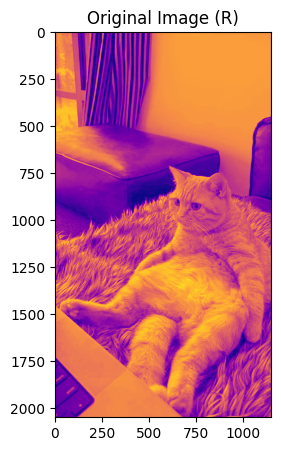

Original Size: 2359296
New Size: 680000
Assuming each pixel is stored in 8 bits (1 byte), the original image takes up 2359296 bytes and the new image takes up 680000 bytes.
Compression Ratio: 680000/2359296 = 0.2882215711805556


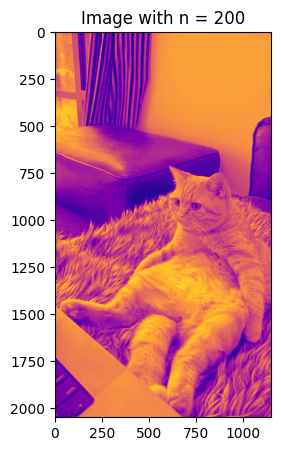

In [68]:
from PIL import Image

def image_compression(A, plot = True, n = None):
    U, S, V = np.linalg.svd(A)
    fig_count = 2
    
    if n == None:
        # Get a list of truncation values
        truncate = range(1, 150, 10)
        for i in range(len(truncate)):

            n = truncate[i]
            # Construct the diagonal matrix from the top k singular values
            S_matrix = np.diag(S[:n])

            # Recompute the original matrix
            recreated_A = U[:, :n] @ S_matrix @ V[:n, :]

            orig_x = np.size(A, 0)
            orig_y = np.size(A, 1)
            comp = (n*(orig_x + orig_y)) / (orig_x * orig_y)
            #print(f"Compression Ratio at n = {n}: {n} * ({orig_x} + {orig_y})/({orig_x}*{orig_y}) = {comp}")

            if plot:
                plt.figure(fig_count, figsize=(10, 5))
                plt.imshow(recreated_A, cmap = "plasma")
                plt.title(f"Image with n = {n}")
                plt.show
                fig_count += 1

    else:
        # Construct the diagonal matrix from the top k singular values
        S_matrix = np.diag(S[:n])
        new_u = U[:, :n]
        new_v = V[:n, :]

        old_size = np.size(A, 0) * np.size(A, 1)
        new_size = np.size(new_u, 0) * np.size(new_u, 1) + np.size(new_v, 0) * np.size(new_v, 1) + np.size(S_matrix, 0) * np.size(S_matrix, 1)

        print(f"Original Size: {old_size}")
        print(f"New Size: {new_size}")
        print(f"Assuming each pixel is stored in 8 bits (1 byte), the original image takes up {old_size} bytes and the new image takes up {new_size} bytes.")
        print(f"Compression Ratio: {new_size}/{old_size} = {new_size/old_size}")

        # Recompute the original matrix
        recreated_A = new_u @ S_matrix @ new_v

        if plot:
            plt.figure(fig_count, figsize=(10, 5))
            plt.imshow(recreated_A, cmap = "plasma")
            plt.title(f"Image with n = {n}")
            plt.show()

        orig_x = np.size(A, 0)
        orig_y = np.size(A, 1)
        comp = (n*(orig_x + orig_y)) / (orig_x * orig_y)
        #print(f"Compression Ratio at n = {n}: {n} * ({orig_x} + {orig_y})/({orig_x}*{orig_y}) = {comp}")


    


    

    


img = Image.open('A4_Image.jpg')
R = np.asarray(img)[:,:,0]   # the last index selects the RG or B component
G = np.asarray(img)[:,:,1]
B = np.asarray(img)[:,:,2]

# Plot the original image
plt.figure(1, figsize=(10, 5))
plt.imshow(R, cmap = "plasma")
plt.title('Original Image (R)')
plt.show()

_ = image_compression(R, n = 200)


Truncating the SVD at n = 200 gives a fairly accurate and detailed recreation of the original image. This is a compression ratio of 0.29. Assuming each pixel is stored in 8 bits (1 byte), the original image takes up ~2.4 MB and the new image takes up ~ 0.68 MB.

# **Question 2 - Fitting Planetary Orbits**

## **a)** Levenberg-Marquardt

Use the Levenberg-Marquardt method to fit the orbital parameters of a planet. The parameters are:
- The orbital period $P$, in days
- The planet mass $M_P$, in Jupiter masses
- The eccentricity of the orbit $e$, between 0 and 1
- The argument of the periastron $\omega$, in radians
- The time of pericenter $t$, in days
- The overall velocity offset $v$, in m/s

The Levenberg-Marquardt Method is:
1. Define a parameter $\lambda$ with a small starting value.
2. Using a quadratic expansion around $x_n$: $$f(x) = f(x_n) + (x - x_n)\frac{df}{dx}|_{x_n} + \frac{(x - x_n)^2}{2}\frac{d^2f}{dx^2}|_{x_n}$$
we find an updated value of the location of the minimum $x_{n+1}$ by minimising this: $$ \frac{df}{dx} = 0 \rightarrow \frac{df}{dx}|_{x_n} + (x_{n+1} - x_n)\frac{d^2f}{dx^2}|_{x_n} = 0 \rightarrow x_{n+1} = n_x - (\frac{d^2f}{dx^2}|_{x_n})^{-1}\frac{df}{dx}|_{x_n}$$
 In multiple dimensions, this is: $$f(\vec{x}) = f(\vec{x_n}) + (\vec{x} - \vec{x_n})\cdot\vec{\nabla f}(\vec{x_n}) + 1/2 (\vec{x} - \vec{x_n})\cdot H \cdot (\vec{x} - \vec{x_n})$$ where $H$ is the Hessian matrix $$(H)_{ij} = \frac{\partial^2f}{\partial x_i \partial x_j}$$ so the update becomes: $$ \vec{x_{n+1}} = \vec{x_n} - H^{-1}\cdot \vec{\nabla}f(\vec{x_n})$$
2. Solve as with Newton's method, but multiply the diagonal elements of $A^TA$ by $(1 + \lambda)$.
3. If $\chi^2$ with the new parameters $a_{n+1}$ is greater than with the current set of parameters $a_n$ then increase $\lambda$ by a factor of 10, go back to $a_n$ and try again.
4. If $\chi^2$ of $a_{n+1}$ is smaller than $\chi^2$ of $a_n$ then reduce $\lambda$ by a factor of 10 and accept $a_{n+1}$.

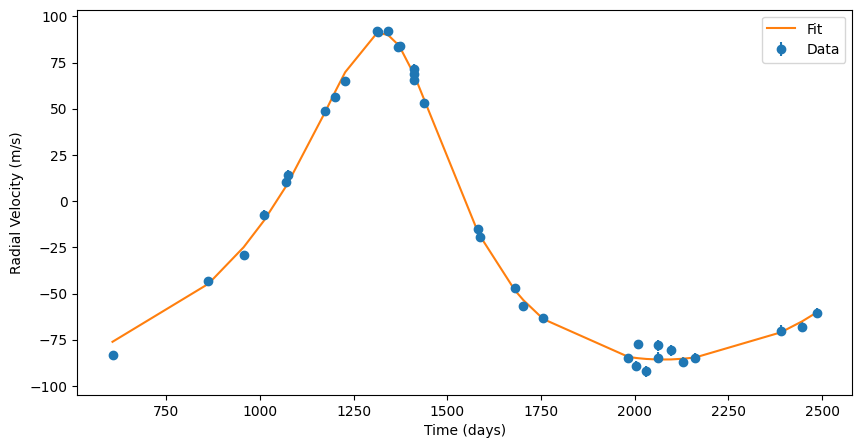

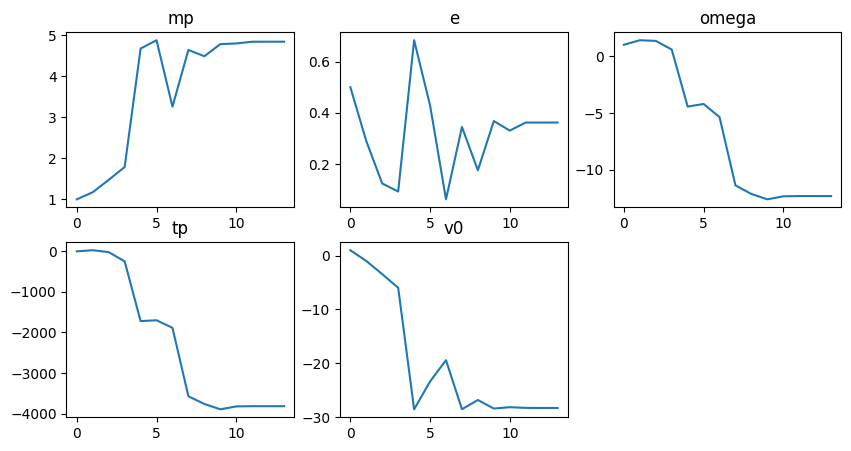

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

def rv(t, P, x):
    # Calculates the radial velocity of a star orbited by a planet
    # at the times in the vector t
    
    # extract the orbit parameters
    # P, t and tp in days, mp in Jupiter masses, v0 in m/s  
    mp, e, omega, tp, v0 = x
        
    # mean anomaly
    M = 2*np.pi * (t-tp) / P
    
    # velocity amplitude
    K = 204 * P**(-1/3) * mp  / np.sqrt(1.0-e*e) # m/s
    
    # solve Kepler's equation for the eccentric anomaly E - e * np.sin(E) = M
    # Iterative method from Heintz DW, "Double stars", Reidel, 1978
    # first guess
    E = M + e*np.sin(M)  + ((e**2)*np.sin(2*M)/2)
    while True:
        E0 = E 
        M0 = E0 - e*np.sin(E0)
        E = E0 + (M-M0)/(1.0 - e*np.cos(E0))
        if np.max(np.abs((E-E0))) < 1e-6:
            break
        
    # evaluate the velocities
    theta = 2.0 * np.arctan( np.sqrt((1+e)/(1-e)) * np.tan(E/2))
    vel = v0 + K * ( np.cos(theta + omega) + e * np.cos(omega))
    
    return vel

def get_derivative(param_array, t, P):
    # Calculates the analytic derivative of the radial velocity function with respect to each parameter
    y = rv(t, P, param_array)
    A = np.zeros((len(t), len(param_array)))

    for i in range(len(param_array)):
        h = 0.001
        param = param_array[i]
        temp_new_param = param_array.copy()
        temp_new_param[i] = param + h
        A[:, i] = (rv(t, P, temp_new_param) - rv(t, P, param_array)) / h    
    
    return y, A

tobs, vobs, eobs = np.loadtxt('A4_Orbital_Data.txt', unpack=True) # Read in data
# tobs = observation times
# vobs = observed velocities
# eobs = error in the observed velocities

# The orbital period of this planet is P = 1724 days
P = 1724

initial_params = np.array([1, 0.5, 1, 1, 1]) # mp, e, omega, tp, v0
param_history = np.array([initial_params.copy()])


chisq1 = 1.0
chisq = 1e99
lam = 1e-3

alpha = 0.1

while chisq > 1e-6:
    cur_params = param_history[-1]
    rv_func, A = get_derivative(cur_params, tobs, P)
    
    # Compute Residuals
    res = vobs - rv_func

    # Get new chi squared
    chisq = np.sum(res**2)

    # Calculate the update to the new parameters
    lhs = (A.T @ A)
    lhs = lhs @ (np.identity(len(cur_params)) * (1 + lam))
    rhs = A.T @ res
    d_params = np.linalg.inv(lhs)@rhs

    # Calc chi squard for new parameters
    if cur_params[1] + d_params[1] < 0 or cur_params[1] + d_params[1] > 1:
        d_params = alpha * d_params

    new_params = cur_params + d_params
    rv_func1, A1 = get_derivative(new_params, tobs, P)
    res1 = vobs - rv_func1
    chisq1 = np.sum(res1**2)

    # If the new chi squared is lower, accept the new parameters
    if chisq1 > chisq:
        lam *= 10
    else:
        lam /= 10
        param_history = np.vstack((param_history, new_params))

        # Break if improvement becomes too small
        if chisq - chisq1 < 1e-3:
            break

# Plot the resulting fit
plt.figure(1, figsize=(10, 5))
plt.errorbar(tobs, vobs, yerr=eobs, fmt='o', label='Data')
plt.plot(tobs, rv_func, label='Fit')
plt.xlabel('Time (days)')
plt.ylabel('Radial Velocity (m/s)')
plt.legend()

# Plot history of each parameter on a subplot
plt.figure(2, figsize=(10, 5))
plt.subplot(2, 3, 1)
plt.plot(param_history[:, 0])
plt.title('mp')

plt.subplot(2, 3, 2)
plt.plot(param_history[:, 1])
plt.title('e')

plt.subplot(2, 3, 3)
plt.plot(param_history[:, 2])
plt.title('omega')

plt.subplot(2, 3, 4)
plt.plot(param_history[:, 3])
plt.title('tp')

plt.subplot(2, 3, 5)
plt.plot(param_history[:, 4])
plt.title('v0')

plt.show()

Lorentzian Fit example

chisq = 4.26834, a=(1.04017, 2.09058, 3.83599), lam = 0.001
chisq = 2.58124, a=(2.28814, 6.85133, 3.16076), lam = 0.0001
chisq = 1.24685, a=(5.54709, 21.0309, 0.465439), lam = 1e-05
chisq = 28547.8, a=(-4.56231, -31.7897, 0.080282), lam = 1e-06
chisq = 29659.1, a=(-4.56222, -31.7892, 0.0802855), lam = 1e-05
chisq = 45550.6, a=(-4.56131, -31.7845, 0.0803201), lam = 0.0001
chisq = 23172.6, a=(-4.55222, -31.737, 0.0806664), lam = 0.001
chisq = 126.604, a=(-4.46223, -31.2668, 0.0840951), lam = 0.01
chisq = 114.153, a=(-3.64329, -26.9879, 0.115296), lam = 0.1
chisq = 12.8848, a=(0.492383, -5.37946, 0.27286), lam = 1
chisq = 1.0781, a=(4.62805, 16.229, 0.430425), lam = 10
chisq = 125.184, a=(0.913202, -2.13465, 0.305554), lam = 1
chisq = 0.928531, a=(3.95262, 12.8901, 0.407721), lam = 10
chisq = 691.542, a=(1.14604, -0.260366, 0.323636), lam = 1
chisq = 0.797736, a=(3.44233, 10.4991, 0.392433), lam = 10
chisq = 4.35027, a=(1.2765, 0.851878, 0.333614), lam = 1
chisq = 0.684764, a=(3.04855, 8.

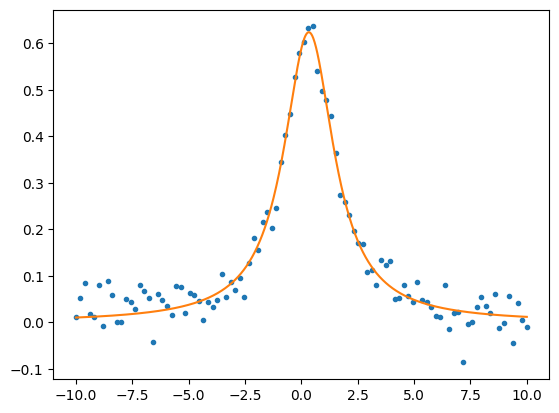

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def lorentz(a, x, finite_difference = False):
    # Calculates the Lorentz function and the derivative with respect to the parameters
    y = a[0] / (a[1] + (x-a[2])**2)
    A =  np.zeros([len(x), len(a)])
    if finite_difference:
        eps = 1e-8
        b = a * (1+eps)
        y0 = b[0] / (a[1] + (x-a[2])**2)
        y1 = a[0] / (b[1] + (x-a[2])**2)
        y2 = a[0] / (a[1] + (x-b[2])**2)
        A[:, 0] = (y0 - y) / (b[0]-a[0])
        A[:, 1] = (y1 - y) / (b[1]-a[1])
        A[:, 2] = (y2 - y) / (b[2]-a[2])
    else:
        A[:, 0] = 1 / (a[1] + (x-a[2])**2)
        A[:, 1] = - a[0] / (a[1] + (x-a[2])**2)**2
        A[:, 2] = 2 * a[0] * (x-a[2]) / (a[1] + (x-a[2])**2)**2
    return y, A

### Fake Data ###
# Generate a set of "measurements" of a Lorentzian function
a0 = np.array((1.2, 2, 0.3))   # parameters of the Lorentzian
ndata = 100   # number of measurements 
x = np.linspace(-10, 10, ndata)
y, _ = lorentz(a0, x) 
y = y + 0.03 * np.random.normal(size = ndata)
### #### #### ###

# Levenberg-Marquardt

# Note that this starting point doesn't converge for Newton!
a = np.array((1,1,4))

# we have two options: analytic or numerical derivatives
finite_difference = True

chisq1 = 1.0
chisq = 1e99
lam = 1e-3
# keep going while chisq is dropping
while chisq > 1e-6:
    # compute the update to the parameters
    f, A = lorentz(a, x, finite_difference = finite_difference)
    r = y-f
    chisq = np.sum(r**2)
    lhs = A.T@A
    lhs = lhs@(np.identity(len(a))*(1+lam))
    rhs = A.T@r
    da = np.linalg.inv(lhs)@rhs
    # calculate the chisq associated with the new parameters
    a1 = a + da
    f1, A1 = lorentz(a1, x, finite_difference=finite_difference)
    r1 = y-f1
    chisq1 = np.sum(r1**2)
    print("chisq = %lg, a=(%lg, %lg, %lg), lam = %lg" % (chisq1 ,a1[0], a1[1], a1[2], lam))
    # accept if chisq decreases; reject if it increases
    if chisq1 > chisq:
        lam = lam * 10
    else:
        lam = lam / 10
        a = a1
        # if the improvement in chisq becomes too small then exit
        if chisq-chisq1 < 1e-3:
            break
    
print("a-a0 =", a-a0)

print("Best-fit parameters are: ", a)

plt.plot(x, y, ".")

xx = np.linspace(-10, 10, 1000)
yy, _ = lorentz(a, xx)
plt.plot(xx,yy)

plt.show()